In [54]:
import pandas as pd
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import nltk
from sklearn.metrics import silhouette_samples, silhouette_score, v_measure_score
from sklearn.datasets import load_files
import re
from unidecode import unidecode
from mpl_toolkits import mplot3d
import seaborn as sns

from nltk.tokenize import word_tokenize

from wordcloud import WordCloud,STOPWORDS

In [2]:
localiza = pd.read_csv('D:/ML/Textos/localiza.txt',
         encoding='utf-8', sep = '\t',low_memory = False)

movida = pd.read_csv('D:/ML/Textos/movida.txt',
           encoding='utf-8', sep = '\t',low_memory = False)

unidas = pd.read_csv('D:/ML/Textos/unidas.txt',
           encoding='utf-8', sep = '\t',low_memory = False)


In [3]:
localiza.head()

,Saibamais
0,"Olá.Neste momento tão singular, gostaria de pe..."
1,nosso comprometimento com a saúde e o bem-esta...
2,"parceiro, frente aos possíveis desdobramentos ..."
3,(COVID-19). Estamos engajados para garantir su...
4,mesmo tempo em que cuidamos das milhares de pe...


In [4]:
#converte todas as letras para minúsculo data
localiza['Saibamais2'] = localiza['Saibamais'].apply(lambda x: x.lower())

In [5]:
localiza.head()

,Saibamais,Saibamais2
0,"Olá.Neste momento tão singular, gostaria de pe...","olá.neste momento tão singular, gostaria de pe..."
1,nosso comprometimento com a saúde e o bem-esta...,nosso comprometimento com a saúde e o bem-esta...
2,"parceiro, frente aos possíveis desdobramentos ...","parceiro, frente aos possíveis desdobramentos ..."
3,(COVID-19). Estamos engajados para garantir su...,(covid-19). estamos engajados para garantir su...
4,mesmo tempo em que cuidamos das milhares de pe...,mesmo tempo em que cuidamos das milhares de pe...


In [6]:
#remove números e caracteres especiais 
localiza['Saibamais2'] = localiza['Saibamais2'].apply(lambda x: re.sub('[0-9]|,|\.|/|$|\(|\)|-|\+|:|•', ' ', x))
#remove acentos 
localiza['Saibamais2'] = localiza['Saibamais2'].apply(lambda x: unidecode(x))

In [7]:
localiza.head()

,Saibamais,Saibamais2
0,"Olá.Neste momento tão singular, gostaria de pe...",ola neste momento tao singular gostaria de pe...
1,nosso comprometimento com a saúde e o bem-esta...,nosso comprometimento com a saude e o bem esta...
2,"parceiro, frente aos possíveis desdobramentos ...",parceiro frente aos possiveis desdobramentos ...
3,(COVID-19). Estamos engajados para garantir su...,covid estamos engajados para garantir su...
4,mesmo tempo em que cuidamos das milhares de pe...,mesmo tempo em que cuidamos das milhares de pe...


In [8]:
#converte as palavras para seu radical 
stemmer = nltk.stem.RSLPStemmer()
localiza['Saibamais2'] = localiza['Saibamais2'].apply(lambda x: stemmer.stem(x))

In [9]:
localiza.tail()

,Saibamais,Saibamais2
32,"Para sanar quaisquer dúvidas adicionais, coloc...",para sanar quaisquer duvidas adicionais coloc...
33,"atendimento, que atendem 24hs, nos 7 dias da s...",atendimento que atendem hs nos dias da s...
34,Localiza Hertz ou nossa Central de Relacioname...,localiza hertz ou nossa central de relacioname...
35,WhatsApp).,whatsapp
36,Agradeço pessoalmente por sua contínua confiança,agradeco pessoalmente por sua continua confianca


In [10]:
# nltk.download('stopwords') 
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.extend(['de','a','o','que','e','do','da','em','um','para','e','com','uma','os','no','se','na','por','mais','as','dos','como','mas',
                 'foi','ao','ele','das','tem','à','seu','sua','ou','ser','quando','muito','ha','nos','ja','esta','eu','tambem','so','pelo',
                 'pela','ate','isso','ela','entre','era','depois','sem','mesmo','aos','ter','seus','quem','nas','me','esse','eles','estao',
                 'voce','tinha','foram','essa','num','nem','suas','meu','às','minha','têm','numa','pelos','elas','havia','seja','qual','sera',
                 'nos','tenho','lhe','deles','essas','esses','pelas','este','fosse','dele','tu','te','vocês','vos','lhes','meus','minhas','teu',
                 'tua','teus','tuas','nosso','nossa','nossos','nossas','dela','delas','esta','estes','estas','aquele','aquela','aqueles','aquelas',
                 'isto','aquilo','estou','esta','estamos','estao','estive','esteve','estivemos','estiveram','estava','estavamos','estavam','estivera',
                 'estiveramos','esteja','estejamos','estejam','estivesse','estivessemos','estivessem','estiver','estivermos','estiverem','hei','ha','havemos',
                 'hão','houve','houvemos','houveram','houvera','houveramos','haja','hajamos','hajam','houvesse','houvessemos','houvessem','houver','houvermos',
                 'houverem','houverei','houvera','houveremos','houverão','houveria','houveríamos','houveriam','sou','somos','sao','era','eramos','eram','fui',
                 'foi','fomos','foram','fora','foramos','seja','sejamos','sejam','fosse','fossemos','fossem','for','formos','forem','serei','sera','seremos',
                 'serao','seria','seríamos','seriam','tenho','tem','temos','tem','tinha','tinhamos','tinham','tive','teve','tivemos','tiveram','tivera','tiveramos',
                 'tenha','tenhamos','tenham','tivesse','tivessemos','tivessem','tiver','tivermos','tiverem','terei','tera','teremos','terao','teria','teriamos','teriam'])
vec = TfidfVectorizer(stop_words=stopwords)
vec.fit(localiza.Saibamais2.values)
features = vec.transform(localiza.Saibamais2.values)

In [11]:
localiza['tamanho'] = localiza['Saibamais2'].apply(len)
localiza.head()

,Saibamais,Saibamais2,tamanho
0,"Olá.Neste momento tão singular, gostaria de pe...",ola neste momento tao singular gostaria de pe...,86
1,nosso comprometimento com a saúde e o bem-esta...,nosso comprometimento com a saude e o bem esta...,79
2,"parceiro, frente aos possíveis desdobramentos ...",parceiro frente aos possiveis desdobramentos ...,82
3,(COVID-19). Estamos engajados para garantir su...,covid estamos engajados para garantir su...,80
4,mesmo tempo em que cuidamos das milhares de pe...,mesmo tempo em que cuidamos das milhares de pe...,81


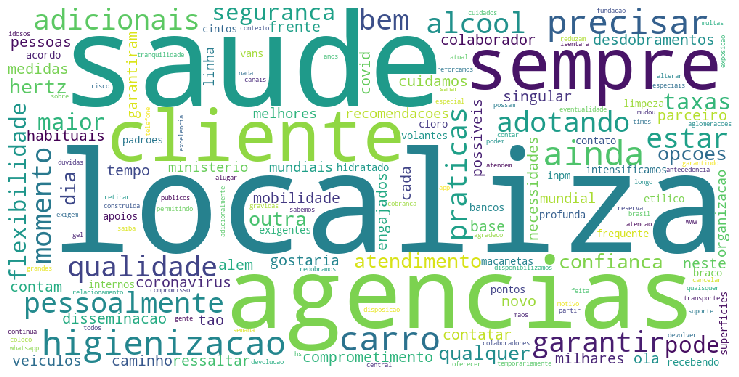

In [25]:
### Word CLoud
#Plotando uma nuvem de palavras para o nosso conjunto de texto
word_cloud = WordCloud(width = 1000, height = 500, stopwords = stopwords, background_color = 'white').generate(''.join(localiza['Saibamais2']))


plt.figure(figsize = (13,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [13]:
#trabalhando com os dados da movida em relação ao COVID-19
movida.head()

,texto
0,Olá.Cuidar adequadamente de todos os nossos cl...
1,reafirmando nosso compromisso com você e toda ...
2,preventivamente já estamos monitorando e atuan...
3,"(Covid19), visando proteger a saúde e bem-esta..."
4,seguindo todas as orientações das autoridades ...


In [14]:
#converte todas as letras para minúsculo data
movida['texto2'] = movida['texto'].apply(lambda x: x.lower())

In [15]:
movida.head()

,texto,texto2
0,Olá.Cuidar adequadamente de todos os nossos cl...,olá.cuidar adequadamente de todos os nossos cl...
1,reafirmando nosso compromisso com você e toda ...,reafirmando nosso compromisso com você e toda ...
2,preventivamente já estamos monitorando e atuan...,preventivamente já estamos monitorando e atuan...
3,"(Covid19), visando proteger a saúde e bem-esta...","(covid19), visando proteger a saúde e bem-esta..."
4,seguindo todas as orientações das autoridades ...,seguindo todas as orientações das autoridades ...


In [16]:
#remove números e caracteres especiais 
movida['texto2'] = movida['texto2'].apply(lambda x: re.sub('[0-9]|,|\.|/|$|\(|\)|-|\+|:|•', ' ', x))
#remove acentos 
movida['texto2'] = movida['texto2'].apply(lambda x: unidecode(x))

In [17]:
movida.head()

,texto,texto2
0,Olá.Cuidar adequadamente de todos os nossos cl...,ola cuidar adequadamente de todos os nossos cl...
1,reafirmando nosso compromisso com você e toda ...,reafirmando nosso compromisso com voce e toda ...
2,preventivamente já estamos monitorando e atuan...,preventivamente ja estamos monitorando e atuan...
3,"(Covid19), visando proteger a saúde e bem-esta...",covid visando proteger a saude e bem esta...
4,seguindo todas as orientações das autoridades ...,seguindo todas as orientacoes das autoridades ...


In [18]:
#converte as palavras para seu radical 
stemmer = nltk.stem.RSLPStemmer()
movida['texto2'] = movida['texto2'].apply(lambda x: stemmer.stem(x))

In [19]:
movida.head()

,texto,texto2
0,Olá.Cuidar adequadamente de todos os nossos cl...,ola cuidar adequadamente de todos os nossos cl...
1,reafirmando nosso compromisso com você e toda ...,reafirmando nosso compromisso com voce e toda ...
2,preventivamente já estamos monitorando e atuan...,preventivamente ja estamos monitorando e atuan...
3,"(Covid19), visando proteger a saúde e bem-esta...",covid visando proteger a saude e bem esta...
4,seguindo todas as orientações das autoridades ...,seguindo todas as orientacoes das autoridades ...


In [20]:
# nltk.download('stopwords') 
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.extend(['todo','de','a','o','que','e','do','da','em','um','para','e','com','uma','os','no','se','na','por','mais','as','dos','como','mas',
                 'foi','ao','ele','das','tem','à','seu','sua','ou','ser','quando','muito','ha','nos','ja','esta','eu','tambem','so','pelo',
                 'pela','ate','isso','ela','entre','era','depois','sem','mesmo','aos','ter','seus','quem','nas','me','esse','eles','estao',
                 'voce','tinha','foram','essa','num','nem','suas','meu','às','minha','têm','numa','pelos','elas','havia','seja','qual','sera',
                 'nos','tenho','lhe','deles','essas','esses','pelas','este','fosse','dele','tu','te','vocês','vos','lhes','meus','minhas','teu',
                 'tua','teus','tuas','nosso','nossa','nossos','nossas','dela','delas','esta','estes','estas','aquele','aquela','aqueles','aquelas',
                 'isto','aquilo','estou','esta','estamos','estao','estive','esteve','estivemos','estiveram','estava','estavamos','estavam','estivera',
                 'estiveramos','esteja','estejamos','estejam','estivesse','estivessemos','estivessem','estiver','estivermos','estiverem','hei','ha','havemos',
                 'hão','houve','houvemos','houveram','houvera','houveramos','haja','hajamos','hajam','houvesse','houvessemos','houvessem','houver','houvermos',
                 'houverem','houverei','houvera','houveremos','houverão','houveria','houveríamos','houveriam','sou','somos','sao','era','eramos','eram','fui',
                 'foi','fomos','foram','fora','foramos','seja','sejamos','sejam','fosse','fossemos','fossem','for','formos','forem','serei','sera','seremos',
                 'serao','seria','seríamos','seriam','tenho','tem','temos','tem','tinha','tinhamos','tinham','tive','teve','tivemos','tiveram','tivera','tiveramos',
                 'tenha','tenhamos','tenham','tivesse','tivessemos','tivessem','tiver','tivermos','tiverem','terei','tera','teremos','terao','teria','teriamos','teriam'])
vec2 = TfidfVectorizer(stop_words=stopwords)
vec2.fit(movida.texto2.values)
features = vec2.transform(movida.texto2.values)

In [21]:
movida['tamanho'] = movida['texto2'].apply(len)
movida.head()

,texto,texto2,tamanho
0,Olá.Cuidar adequadamente de todos os nossos cl...,ola cuidar adequadamente de todos os nossos cl...,99
1,reafirmando nosso compromisso com você e toda ...,reafirmando nosso compromisso com voce e toda ...,84
2,preventivamente já estamos monitorando e atuan...,preventivamente ja estamos monitorando e atuan...,91
3,"(Covid19), visando proteger a saúde e bem-esta...",covid visando proteger a saude e bem esta...,95
4,seguindo todas as orientações das autoridades ...,seguindo todas as orientacoes das autoridades ...,73


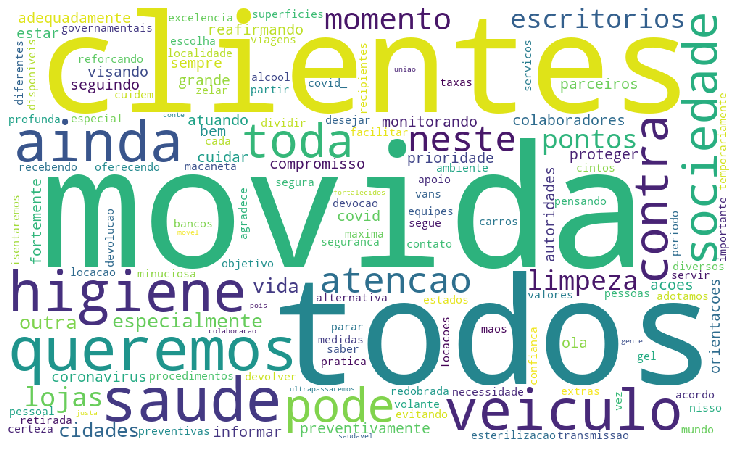

In [22]:
### Word CLoud
#Plotando uma nuvem de palavras para o nosso conjunto de texto
word_cloud = WordCloud(width = 1000, height = 600, stopwords = stopwords, background_color = 'white').generate(''.join(movida['texto2']))

plt.figure(figsize = (13,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

In [26]:
#Nuvem de palavras do posicionamento da Unidas em relação ao COVID-19
unidas.head()

,Texto
0,O nosso principal compromisso é com o seu bem-...
1,Desde o surgimento do novo CORONAVÍRUS (COVID-...
2,contribuam para a redução da propagação do vír...
3,Nosso comitê interno determinou uma série de a...
4,Lembramos que este momento sem precedentes exi...


In [27]:
#converte todas as letras para minúsculo data
unidas['Texto2'] = unidas['Texto'].apply(lambda x: x.lower())

In [30]:
#remove números e caracteres especiais 
unidas['Texto2'] = unidas['Texto2'].apply(lambda x: re.sub('[0-9]|,|\.|/|$|\(|\)|-|\+|:|•', ' ', x))
#remove acentos 
unidas['Texto2'] = unidas['Texto2'].apply(lambda x: unidecode(x))

#converte as palavras para seu radical 
stemmer = nltk.stem.RSLPStemmer()
unidas['Texto2'] = unidas['Texto2'].apply(lambda x: stemmer.stem(x))

unidas.head()

,Texto,Texto2
0,O nosso principal compromisso é com o seu bem-...,o nosso principal compromisso e com o seu bem ...
1,Desde o surgimento do novo CORONAVÍRUS (COVID-...,desde o surgimento do novo coronavirus covid ...
2,contribuam para a redução da propagação do vír...,contribuam para a reducao da propagacao do vir...
3,Nosso comitê interno determinou uma série de a...,nosso comite interno determinou uma serie de a...
4,Lembramos que este momento sem precedentes exi...,lembramos que este momento sem precedentes exi...


In [31]:
# nltk.download('stopwords') 
stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords.extend(['todo','de','a','o','que','e','do','da','em','um','para','e','com','uma','os','no','se','na','por','mais','as','dos','como','mas',
                 'foi','ao','ele','das','tem','à','seu','sua','ou','ser','quando','muito','ha','nos','ja','esta','eu','tambem','so','pelo',
                 'pela','ate','isso','ela','entre','era','depois','sem','mesmo','aos','ter','seus','quem','nas','me','esse','eles','estao',
                 'voce','tinha','foram','essa','num','nem','suas','meu','às','minha','têm','numa','pelos','elas','havia','seja','qual','sera',
                 'nos','tenho','lhe','deles','essas','esses','pelas','este','fosse','dele','tu','te','vocês','vos','lhes','meus','minhas','teu',
                 'tua','teus','tuas','nosso','nossa','nossos','nossas','dela','delas','esta','estes','estas','aquele','aquela','aqueles','aquelas',
                 'isto','aquilo','estou','esta','estamos','estao','estive','esteve','estivemos','estiveram','estava','estavamos','estavam','estivera',
                 'estiveramos','esteja','estejamos','estejam','estivesse','estivessemos','estivessem','estiver','estivermos','estiverem','hei','ha','havemos',
                 'hão','houve','houvemos','houveram','houvera','houveramos','haja','hajamos','hajam','houvesse','houvessemos','houvessem','houver','houvermos',
                 'houverem','houverei','houvera','houveremos','houverão','houveria','houveríamos','houveriam','sou','somos','sao','era','eramos','eram','fui',
                 'foi','fomos','foram','fora','foramos','seja','sejamos','sejam','fosse','fossemos','fossem','for','formos','forem','serei','sera','seremos',
                 'serao','seria','seríamos','seriam','tenho','tem','temos','tem','tinha','tinhamos','tinham','tive','teve','tivemos','tiveram','tivera','tiveramos',
                 'tenha','tenhamos','tenham','tivesse','tivessemos','tivessem','tiver','tivermos','tiverem','terei','tera','teremos','terao','teria','teriamos','teriam'])
vec3 = TfidfVectorizer(stop_words=stopwords)
vec3.fit(movida.texto2.values)
features = vec3.transform(unidas.Texto2.values)

unidas['tamanho'] = unidas['Texto2'].apply(len)
unidas.head()

,Texto,Texto2,tamanho
0,O nosso principal compromisso é com o seu bem-...,o nosso principal compromisso e com o seu bem ...,157
1,Desde o surgimento do novo CORONAVÍRUS (COVID-...,desde o surgimento do novo coronavirus covid ...,223
2,contribuam para a redução da propagação do vír...,contribuam para a reducao da propagacao do vir...,61
3,Nosso comitê interno determinou uma série de a...,nosso comite interno determinou uma serie de a...,137
4,Lembramos que este momento sem precedentes exi...,lembramos que este momento sem precedentes exi...,197


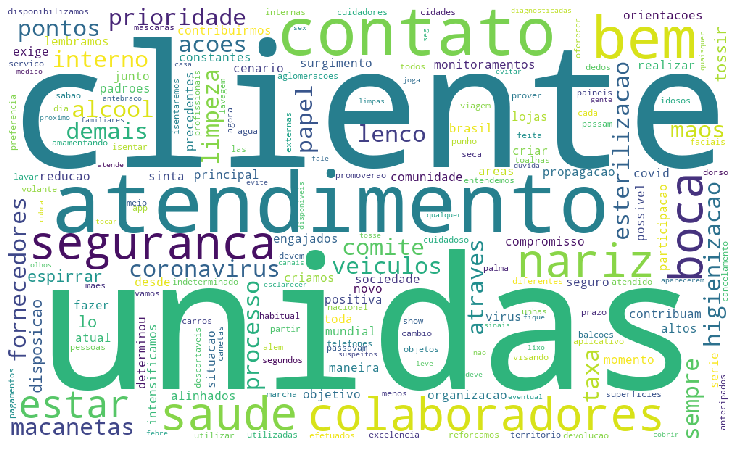

In [32]:
### Word CLoud
#Plotando uma nuvem de palavras para o nosso conjunto de texto
word_cloud = WordCloud(width = 1000, height = 600, stopwords = stopwords, background_color = 'white').generate(''.join(unidas['Texto2']))

plt.figure(figsize = (13,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

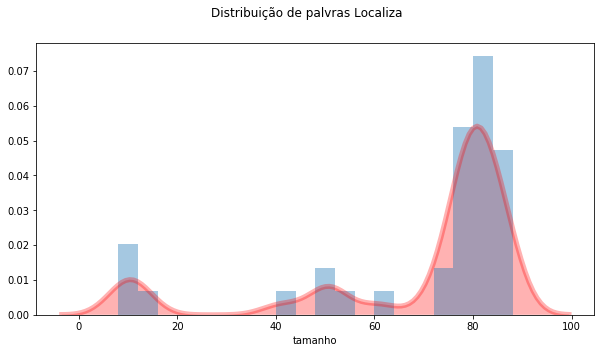

In [56]:
# Histograma de distribuição das palavras
fig = plt.figure(figsize=(10,5))
fig.suptitle('Distribuição de palvras Localiza')
sns.distplot( a=localiza['tamanho'],bins=20, kde=True,
kde_kws={"color": "r", "alpha":0.3, "linewidth": 5, "shade":True })

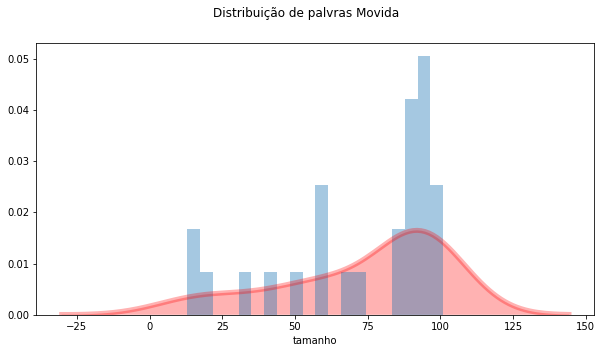

In [58]:
# Histograma de distribuição das palavras
fig = plt.figure(figsize=(10,5))
fig.suptitle('Distribuição de palvras Movida')
sns.distplot( a=movida['tamanho'],bins=20, kde=True,
kde_kws={"color": "r", "alpha":0.3, "linewidth": 5, "shade":True })

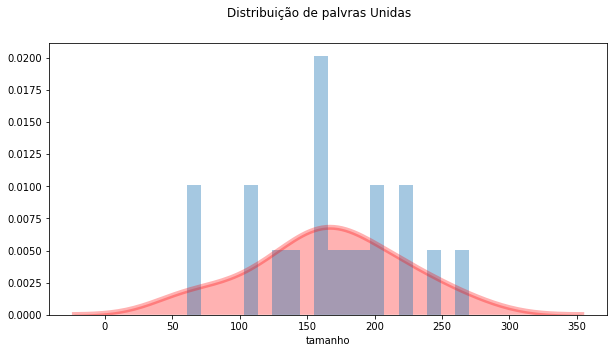

In [59]:
# Histograma de distribuição das palavras
fig = plt.figure(figsize=(10,5))
fig.suptitle('Distribuição de palvras Unidas')
sns.distplot( a=unidas['tamanho'],bins=20, kde=True,
kde_kws={"color": "r", "alpha":0.3, "linewidth": 5, "shade":True })